In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Read the CSV file
csv_file_path = (r'uip8-fykc_version_179.csv')
data = pd.read_csv(csv_file_path)

In [ ]:
# Display the first few rows of the data

data

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column
0,285704165,2024-04-22T00:00:00.000,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,M,18,0,25-44,M,WHITE HISPANIC,990624,216791,40.761718,-73.976988,POINT (-73.976988 40.761718)
1,285767638,2024-04-23T00:00:00.000,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510B,F,S,121,0,25-44,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
2,285205536,2024-04-12T00:00:00.000,510.0,"CONTROLLED SUBSTANCE, INTENT T",117.0,DANGEROUS DRUGS,PL 2200601,F,Q,113,0,45-64,M,BLACK,1047068,186421,40.678139,-73.773521,POINT (-73.773521 40.678139)
3,284838242,2024-04-04T00:00:00.000,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,K,94,0,<18,M,WHITE HISPANIC,996691,199879,40.715291,-73.955120,POINT (-73.95512 40.715291)
4,285277179,2024-04-13T00:00:00.000,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,Q,106,0,25-44,M,BLACK,1026657,182887,40.668558,-73.847133,POINT (-73.84713320780025 40.66855770285469)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260498,280054237,2024-01-06T00:00:00.000,117.0,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,Q,105,0,25-44,M,ASIAN / PACIFIC ISLANDER,1055083,203520,40.725008,-73.744448,POINT (-73.74444795909203 40.725008454343)
260499,281601034,2024-02-03T00:00:00.000,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601504,F,B,40,0,18-24,M,BLACK,1005040,234533,40.810391,-73.924895,POINT (-73.924895 40.810391)
260500,283743231,2024-03-14T00:00:00.000,494.0,"STOLEN PROPERTY 2,1,POSSESSION",111.0,POSSESSION OF STOLEN PROPERTY,PL 1654502,F,K,66,0,18-24,M,BLACK,988954,171297,40.636846,-73.983051,POINT (-73.98305130497697 40.63684599387132)
260501,281465363,2024-02-01T00:00:00.000,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,13,0,18-24,M,BLACK,989801,208576,40.739168,-73.979969,POINT (-73.97996881619639 40.73916778642602)


In [ ]:
# Display the columns of the data
print(data.columns)

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column'],
      dtype='object')


In [ ]:
# Print the original column names
print("Original column names:", data.columns)

Original column names: Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column'],
      dtype='object')


In [ ]:
# Rename the columns
data = data.rename(columns={
    'arrest_key': 'Arrest_Key',
    'arrest_date': 'Arrest_Date',
    'pd_cd': 'PD_CD',
    'pd_desc': 'PD_Desc',
    'ofns_desc': 'OFNS_Desc',
    'law_cat_cd': 'Law_Cat_CD',
    'jurisdiction_code': 'Jurisdiction_Code',
    'age_group': 'Age_Group',
    'perp_sex': 'Perp_Gender',
    'x_coord_cd': 'X_Coord_CD',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'geocoded_column': 'Geocoded_Column'
})


In [ ]:
# Print the updated column names
print("Updated column names:", data.columns)

Updated column names: Index(['Arrest_Key', 'Arrest_Date', 'PD_CD', 'PD_Desc', 'ky_cd', 'OFNS_Desc',
       'law_code', 'Law_Cat_CD', 'arrest_boro', 'arrest_precinct',
       'Jurisdiction_Code', 'Age_Group', 'Perp_Gender', 'perp_race',
       'X_Coord_CD', 'y_coord_cd', 'Latitude', 'Longitude', 'Geocoded_Column'],
      dtype='object')


In [ ]:
# Count the number of occurrences of each age group
age_group_counts = data['Age_Group'].value_counts()

In [ ]:
# Display the counts of each age group
print(age_group_counts)

Age_Group
25-44    152034
45-64     51121
18-24     43174
<18        9525
65+        4649
Name: count, dtype: int64


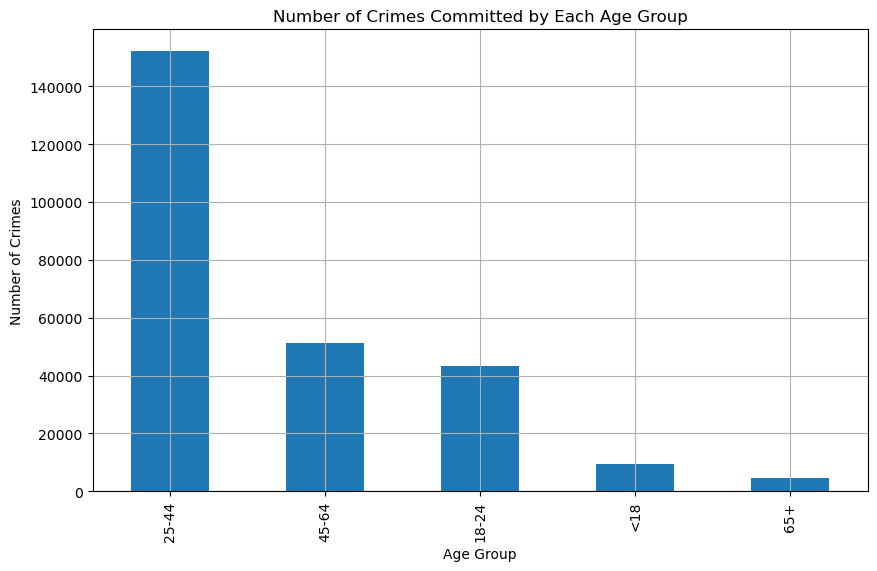

In [ ]:
# Plot the counts of each age group
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar')
plt.title('Number of Crimes Committed by Each Age Group')
plt.xlabel('Age Group')  # Set x-axis label
plt.ylabel('Number of Crimes')  # Set y-axis label
plt.grid(True)
plt.show()

In [ ]:
# Count the number of occurrences of each crime relating to Gender
crime_gender_counts = data.groupby(['OFNS_Desc', 'Perp_Gender']).size().unstack()

In [ ]:
# Set the style of the plot
plt.style.use('ggplot') 

<Figure size 1000x600 with 0 Axes>

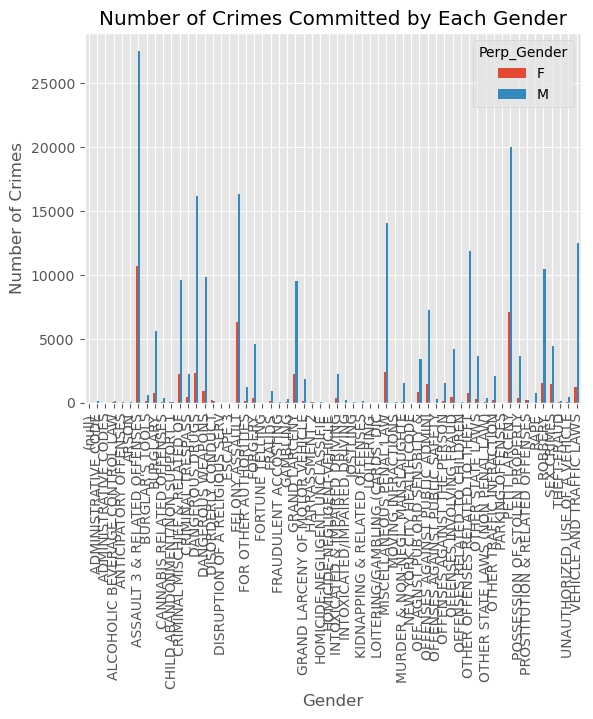

In [ ]:
# Plot the counts of each crime relating to Gender Correlation
plt.figure(figsize=(10, 6))
crime_gender_counts.plot(kind='bar')
plt.title('Number of Crimes Committed by Each Gender')
plt.xlabel('Gender')  # Set x-axis label
plt.ylabel('Number of Crimes')  # Set y-axis label
plt.grid(True)
plt.show()

In [ ]:
# plot the style for ggplot
plt.style.use('ggplot')

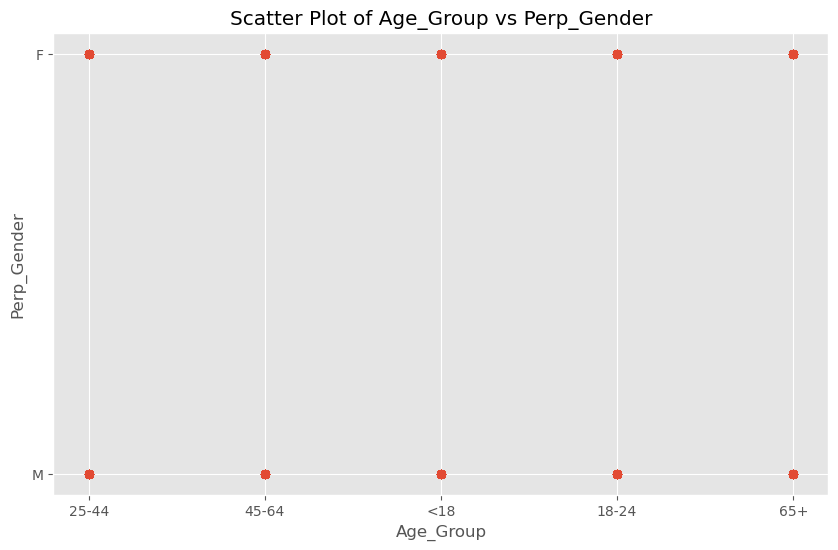

In [ ]:
# Scatter plot of Age_Group vs Perp_Gender
plt.figure(figsize=(10, 6))
plt.scatter(data['Age_Group'], data['Perp_Gender'], alpha=0.5)
plt.title('Scatter Plot of Age_Group vs Perp_Gender')
plt.xlabel('Age_Group')  # Set x-axis label
plt.ylabel('Perp_Gender')    # Set y-axis label
plt.grid(True)
plt.show()

In [ ]:
# Count the number of occurrences of each crime relating to Gender Counts

crime_gender_counts = data.groupby(['OFNS_Desc', 'Perp_Gender']).size().unstack()

<Figure size 1400x800 with 0 Axes>

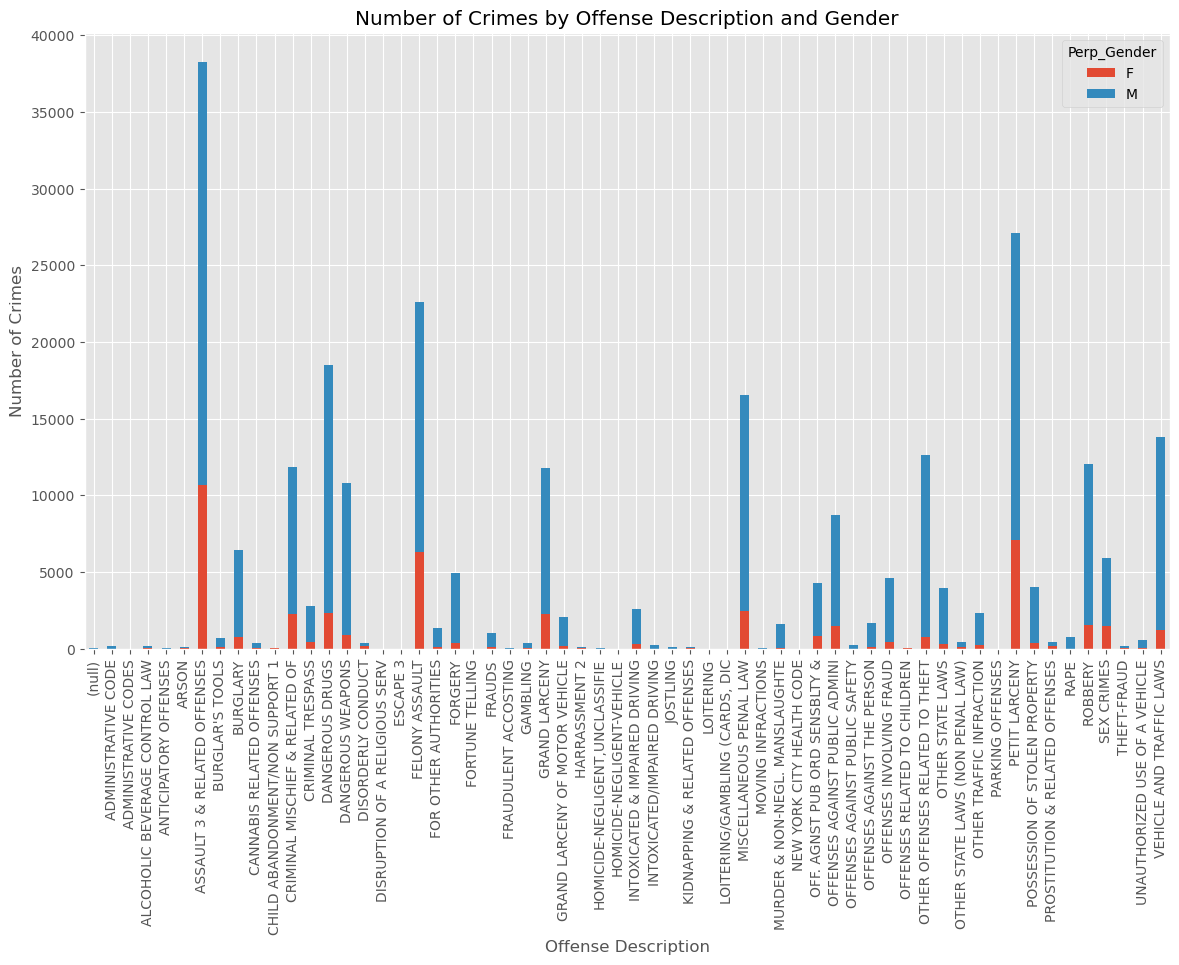

In [ ]:
# Plot the counts of each crime relating to Offense Description
plt.figure(figsize=(14, 8))
crime_gender_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Number of Crimes by Offense Description and Gender')
plt.xlabel('Offense Description')  # Set x-axis label
plt.ylabel('Number of Crimes')  # Set y-axis label
plt.legend(title='Perp_Gender')
plt.grid(True)
plt.show()

In [ ]:
# Filter the data for age group '<18'
under_18_data = data[data['Age_Group'] == '<18']

In [ ]:
# Count the number of occurrences of each crime for age group '<18'
under_18_crime_counts = under_18_data['OFNS_Desc'].value_counts()

In [ ]:
# Display the counts of each crime for age group '<18'
under_18_crime_count = under_18_data.shape[0]
print(f"Number of crimes committed by individuals under 18 years old: {under_18_crime_count}")


Number of crimes committed by individuals under 18 years old: 9525


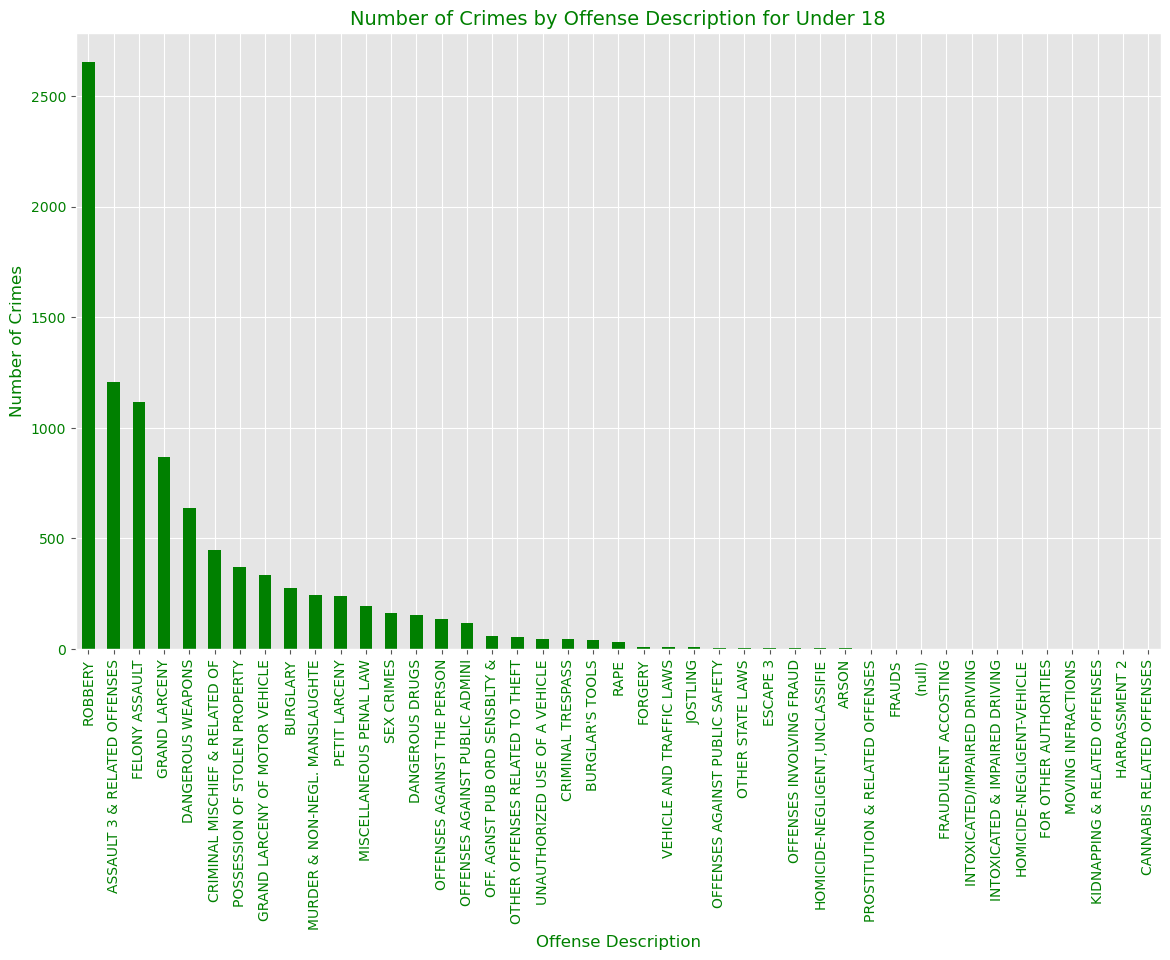

In [ ]:
# value_counts of each crime for age group '<18'
under_18_crime_counts = under_18_data['OFNS_Desc'].value_counts()

# Plot the counts of each crime for age group '<18'
plt.figure(figsize=(14, 8))
under_18_crime_counts.plot(kind='bar', color='green')
plt.title('Number of Crimes by Offense Description for Under 18', fontsize=14, color='green')
plt.xlabel('Offense Description', fontsize=12, color='green')  # Set x-axis label
plt.ylabel('Number of Crimes', fontsize=12, color='green')  # Set y-axis label
plt.xticks(color='green')
plt.yticks(color='green')
plt.grid(True)
plt.show()